In [1]:
%pylab inline
%gui qt

Populating the interactive namespace from numpy and matplotlib


In [2]:
from spiketag.mvc import Sorter

In [3]:
app = Sorter('/mnt/ramdisk/pcie.bin')

[INFO/MainProcess] load mua data


#############  load data  ###################
/mnt/ramdisk/pcie.bin loaded, it contains: 
30150587 * 32 points (3859275136 bytes) 
32 channels with sampling rate of 25000.0000 
1206.023 secs (20.100 mins) of data
#############################################


[INFO/MainProcess] removing high corr noise from spikes pool
[INFO/MainProcess] extract spikes from pivital meta data
[INFO/MainProcess] extrat features with weighted-pca
[INFO/MainProcess] clustering with hdbscan
[INFO/PoolWorker-1] child process calling self.run()
[INFO/PoolWorker-2] child process calling self.run()
[INFO/PoolWorker-3] child process calling self.run()
[INFO/PoolWorker-4] child process calling self.run()
[INFO/PoolWorker-5] child process calling self.run()
[INFO/PoolWorker-6] child process calling self.run()
[INFO/PoolWorker-7] child process calling self.run()
[INFO/PoolWorker-8] child process calling self.run()
[INFO/PoolWorker-9] child process calling self.run()
[INFO/PoolWorker-10] child process calling self.run()
[INFO/PoolWorker-11] child process calling self.run()
[INFO/PoolWorker-12] child process calling self.run()
[INFO/PoolWorker-13] child process calling self.run()
[INFO/PoolWorker-14] child process calling self.run()
[INFO/PoolWorker-15] child process call

clustering finished, used 7.07061505318 seconds


[INFO/MainProcess] Model.spktag is generated, ch_span:1, nspk:309140


In [5]:
app.model.fet[26].shape

(12843, 6)

In [142]:
spk = app.model.spk[26]

In [143]:
X = spk.transpose(0,2,1).ravel().reshape(-1, spk.shape[1]*spk.shape[2])

In [144]:
X.shape

(12843, 75)

In [54]:
fet = app.model.fet[26][:,:3]

In [21]:
W = app.model.spk.W
W.shape

(75,)

In [17]:
X.shape

(12843, 75)

In [18]:
fet.shape

(12843, 6)

In [100]:
from sklearn.decomposition import PCA

In [101]:
pca = PCA(n_components=3, whiten=False)

In [163]:
X = X - X.mean(axis=0)

In [164]:
pca.fit(X*W)

PCA(copy=True, n_components=3, whiten=False)

In [165]:
pca.components_.shape

(3, 75)

In [166]:
y = np.dot(X*W, pca.components_.T)
scale = y.max()-y.min()
scale

4792.8272189508025

In [167]:
y = y/scale

In [168]:
y

array([[ 0.09921453, -0.0267712 , -0.03896852],
       [-0.63297327,  0.00841922,  0.01510184],
       [ 0.064973  , -0.01738713, -0.01092023],
       ..., 
       [ 0.00267315, -0.07196072, -0.0287595 ],
       [ 0.12025453,  0.00200569,  0.00691103],
       [-0.01097072, -0.02903458, -0.01360033]])

In [169]:
fet

array([[ 0.09921446, -0.02677119, -0.03896849],
       [-0.63297329,  0.00841922,  0.01510186],
       [ 0.06497294, -0.01738712, -0.01092021],
       ..., 
       [ 0.0026731 , -0.07196071, -0.02875947],
       [ 0.12025446,  0.0020057 ,  0.00691106],
       [-0.01097078, -0.02903457, -0.0136003 ]])

In [170]:
(y-fet).max()

7.3919066312377879e-08

In [118]:
from spiketag.view import scatter_3d_view

In [121]:
sdview = scatter_3d_view()
sdview.set_data(y, app.model.clu[26].membership)
sdview.show()

In [120]:
app.run()

In [146]:
shift = X.mean(axis=0)

In [147]:
spk[0].T.ravel() - shift

array([  19.10100555,   30.25268936,   38.72301483,   41.67009735,
         38.5408783 ,   32.1462326 ,   26.24269104,   26.07961273,
         33.15322876,   44.40037537,   56.07067871,   62.94360352,
         61.33018494,   50.94772339,   34.40341187,   16.80612946,
          0.94465256,   -8.62097359,  -13.56030273,  -16.2282753 ,
        -20.04705238,  -25.15418243,  -31.79760742,  -39.24756241,
        -44.65850067,   -2.19132996,   -6.3511734 ,   -9.09179688,
         -7.45845413,    1.50310898,   19.2201004 ,   45.31980896,
         75.00854492,  102.22372437,  118.95129395,  119.85037231,
        104.4312439 ,   75.50814819,   39.82710266,    4.24175262,
        -25.06676102,  -46.05003357,  -60.04127884,  -69.59259033,
        -78.48413086,  -88.12599182,  -96.26195526,  -98.74410248,
        -94.20173645,  -80.16255188,   14.55669403,   -7.07171631,
        -29.76160812,  -45.41725922,  -49.53750229,  -39.09191132,
        -16.0507431 ,   14.0460968 ,   44.35440063,   65.03091

In [149]:
X[0] - shift

array([  19.10100555,   30.25268936,   38.72301483,   41.67009735,
         38.5408783 ,   32.1462326 ,   26.24269104,   26.07961273,
         33.15322876,   44.40037537,   56.07067871,   62.94360352,
         61.33018494,   50.94772339,   34.40341187,   16.80612946,
          0.94465256,   -8.62097359,  -13.56030273,  -16.2282753 ,
        -20.04705238,  -25.15418243,  -31.79760742,  -39.24756241,
        -44.65850067,   -2.19132996,   -6.3511734 ,   -9.09179688,
         -7.45845413,    1.50310898,   19.2201004 ,   45.31980896,
         75.00854492,  102.22372437,  118.95129395,  119.85037231,
        104.4312439 ,   75.50814819,   39.82710266,    4.24175262,
        -25.06676102,  -46.05003357,  -60.04127884,  -69.59259033,
        -78.48413086,  -88.12599182,  -96.26195526,  -98.74410248,
        -94.20173645,  -80.16255188,   14.55669403,   -7.07171631,
        -29.76160812,  -45.41725922,  -49.53750229,  -39.09191132,
        -16.0507431 ,   14.0460968 ,   44.35440063,   65.03091

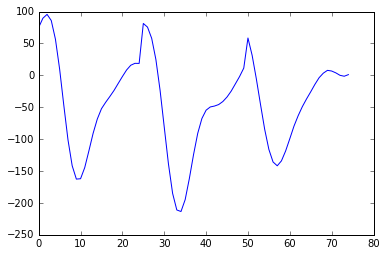

In [154]:
plot(spk[0].T.ravel())

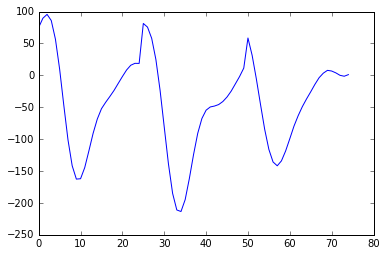

In [155]:
plot(X[0])

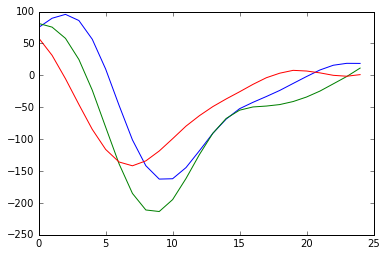

In [196]:
plot(spk[0])

In [225]:
spk[0].shape

(25, 3)

### stack version

In [305]:
i0 = np.hstack(spk[0].T)-shift

In [306]:
window = W/scale

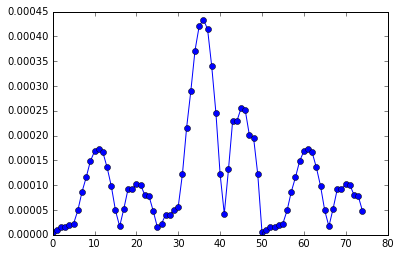

In [350]:
plot(window.ravel(), '-o')

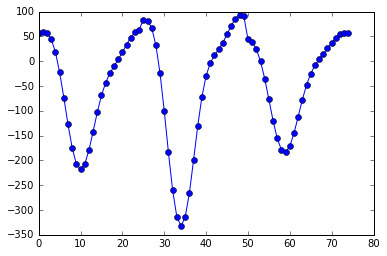

In [352]:
plot(shift.ravel(), '-o')

In [307]:
i0 = i0*window
i0

array([  1.19138258e-04,   2.68910227e-04,   6.32704621e-04,
         6.64233586e-04,   7.81428574e-04,   7.31598433e-04,
         1.28590579e-03,   2.25365259e-03,   3.83805729e-03,
         6.59433912e-03,   9.43386411e-03,   1.09274263e-02,
         1.01802940e-02,   6.91929933e-03,   3.38231928e-03,
         8.24576283e-04,   1.60042345e-05,  -4.54060206e-04,
        -1.24765277e-03,  -1.48681875e-03,  -2.04429179e-03,
        -2.53125514e-03,  -2.55263889e-03,  -3.07123413e-03,
        -2.17625217e-03,  -3.41698286e-05,  -1.41135839e-04,
        -3.71382621e-04,  -2.97224872e-04,   7.61900324e-05,
         1.09354924e-03,   5.55173672e-03,   1.62045353e-02,
         2.95853922e-02,   4.41665844e-02,   5.04119155e-02,
         4.53248883e-02,   3.13342913e-02,   1.35224710e-02,
         1.04255370e-03,  -3.07469020e-03,  -1.95044075e-03,
        -7.90582270e-03,  -1.60076419e-02,  -1.79765987e-02,
        -2.24665499e-02,  -2.42170034e-02,  -1.98173744e-02,
        -1.84288890e-02,

In [308]:
np.dot(i0, pca.components_.T)

array([ 0.09921453, -0.0267712 , -0.03896852])

In [309]:
fet[0]

array([ 0.09921446, -0.02677119, -0.03896849])

### FIR version

In [310]:
spk[0].shape

(25, 3)

In [312]:
s = spk[0].T
s.shape

(3, 25)

In [314]:
shift = shift.reshape(3,-1)

In [316]:
window = window.reshape(3,-1)

In [330]:
pca.components_.T.shape

(75, 3)

In [331]:
comp = pca.components_.T.reshape(3,25,3)
comp.shape

(3, 25, 3)

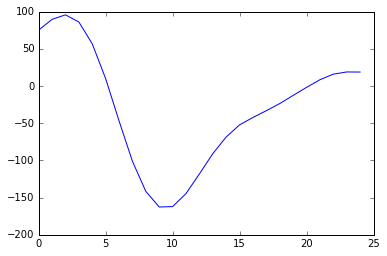

In [336]:
plot(s[0])

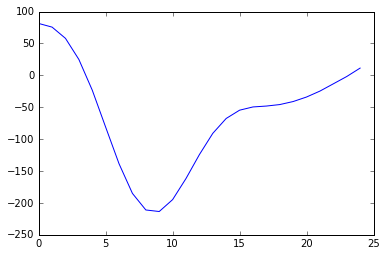

In [337]:
plot(s[1])

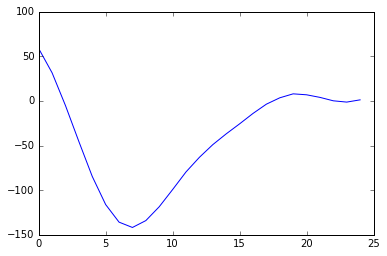

In [338]:
plot(s[2])

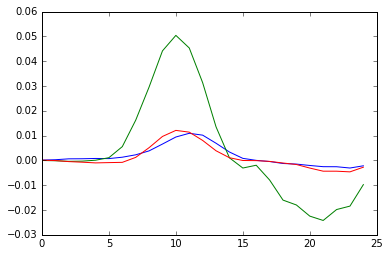

In [361]:
plot(((s - shift)*window).T)

In [339]:
fir0 = np.dot((s[0] - shift[0])*window[0], comp[0])

In [340]:
fir1 = np.dot((s[1] - shift[1])*window[1], comp[1])

In [341]:
fir2 = np.dot((s[2] - shift[2])*window[2], comp[2])

In [342]:
fir0 + fir1 + fir2

array([ 0.09921453, -0.0267712 , -0.03896852])

In [ ]:
app.model.spktag.spktag['spk'].shape

In [268]:
chmask = app.model.spktag.spktag['ch'] == app.ch

In [279]:
app.model.spktag.spktag['t'][chmask][app.clu[0]][0]

60719

In [278]:
app.model.spktag.spktag['spk'][chmask][app.clu[0]][0]

array([[  25.24938965,   73.30993652,    9.65356445],
       [  30.58972168,   73.70812988,    6.38720703],
       [  30.92871094,   57.74914551,   -5.42700195],
       [  17.42382812,   19.61352539,  -24.53942871],
       [ -14.60681152,  -40.20605469,  -48.81933594],
       [ -66.18188477, -113.51550293,  -74.55517578],
       [-130.66784668, -190.17810059,  -97.22741699],
       [-194.73522949, -256.48913574, -116.40979004],
       [-242.17236328, -298.63806152, -127.35705566],
       [-259.71887207, -308.7199707 , -129.98059082],
       [-242.9152832 , -286.49835205, -124.65466309],
       [-195.52954102, -239.03857422, -112.46069336],
       [-129.61328125, -177.26342773,  -94.92089844],
       [ -60.59338379, -113.57092285,  -74.42468262],
       [  -2.90527344,  -58.01843262,  -53.80505371],
       [  33.35986328,  -15.25354004,  -33.37158203],
       [  48.45556641,   14.10705566,  -15.2520752 ],
       [  47.29260254,   34.54724121,    1.6619873 ],
       [  40.85949707,   50.

In [281]:
mua = app.model.mua

In [295]:
mua.data[60719-10:60719+15,26]

array([  73.30993652,   73.70812988,   57.74914551,   19.61352539,
        -40.20605469, -113.51550293, -190.17810059, -256.48913574,
       -298.63806152, -308.7199707 , -286.49835205, -239.03857422,
       -177.26342773, -113.57092285,  -58.01843262,  -15.25354004,
         14.10705566,   34.54724121,   50.95214844,   64.1583252 ,
         75.74365234,   83.71057129,   85.72021484,   80.76843262,
         71.17712402], dtype=float32)

In [292]:
npmm = np.memmap('/mnt/ramdisk/pcie.bin', dtype=np.int32).reshape(-1,32)

In [296]:
npmm[60719-10:60719+15,26]

memmap([ 1201110,  1207634,   946162,   321348,  -658736, -1859838,
       -3115878, -4202318, -4892886, -5058068, -4693989, -3916408,
       -2904284, -1860746,  -950574,  -249914,   231130,   566022,
         834800,  1051170,  1240984,  1371514,  1404440,  1323310,  1166166], dtype=int32)

In [298]:
np.asarray(mua.data[60719-10:60719+15,26]*float(2**14), dtype=np.int32)

array([ 1201110,  1207634,   946162,   321348,  -658736, -1859838,
       -3115878, -4202318, -4892886, -5058068, -4693989, -3916408,
       -2904284, -1860746,  -950574,  -249914,   231130,   566022,
         834800,  1051170,  1240984,  1371514,  1404440,  1323310,  1166166], dtype=int32)

In [301]:
window

array([  6.23727678e-06,   8.88880401e-06,   1.63392397e-05,
         1.59402936e-05,   2.02753183e-05,   2.27584502e-05,
         4.90005307e-05,   8.64143426e-05,   1.15767225e-04,
         1.48519896e-04,   1.68249508e-04,   1.73606620e-04,
         1.65991576e-04,   1.35811747e-04,   9.83134840e-05,
         4.90640207e-05,   1.69419268e-05,   5.26692492e-05,
         9.20077369e-05,   9.16190243e-05,   1.01974682e-04,
         1.00629593e-04,   8.02777032e-05,   7.82528631e-05,
         4.87309725e-05,   1.55931919e-05,   2.22220100e-05,
         4.08480992e-05,   3.98507340e-05,   5.06882957e-05,
         5.68961255e-05,   1.22501327e-04,   2.16035857e-04,
         2.89418062e-04,   3.71299739e-04,   4.20623770e-04,
         4.34016551e-04,   4.14978940e-04,   3.39529368e-04,
         2.45783710e-04,   1.22660052e-04,   4.23548170e-05,
         1.31673123e-04,   2.30019342e-04,   2.29047561e-04,
         2.54936704e-04,   2.51573982e-04,   2.00694258e-04,
         1.95632158e-04,

In [304]:
np.asarray(shift*float(2**14), dtype=np.int32)

array([  919287,   972001,   932750,   726565,   296672,  -365065,
       -1199536, -2085000, -2864842, -3392215, -3574322, -3400332,
       -2941677, -2324515, -1686049, -1131589,  -707775,  -401895,
        -164570,    58610,   298514,   550320,   781404,   952306,
        1038956,  1369520,  1343769,  1099878,   530857,  -405332,
       -1645330, -3014227, -4261820, -5132875, -5446764, -5155585,
       -4360255, -3272395, -2141945, -1176532,  -483816,   -56750,
         195432,   390164,   613528,   887836,  1173409,  1400715,
        1513729,  1500469,   721491,   630737,   400982,    -2503,
        -575325, -1262086, -1962372, -2553123, -2923618, -3008266,
       -2805919, -2379001, -1830611, -1271150,  -784719,  -410195,
        -139596,    64483,   243984,   425122,   608206,   772213,
         890125,   944884,   939761], dtype=int32)

In [395]:
g = lambda x: [str(x*'1') + '0' + str((7-x)*'0'), str(x*'1') + '0' + str((7-x)*'1')]

In [396]:
for i in range(8): print g(i)

['00000000', '01111111']
['10000000', '10111111']
['11000000', '11011111']
['11100000', '11101111']
['11110000', '11110111']
['11111000', '11111011']
['11111100', '11111101']
['11111110', '11111110']


In [391]:
0b01111111

127

In [397]:
0b1111

15

In [398]:
bin(31)

'0b11111'